In [1]:
from loader import load_data 
from path_finder import pick_next_room, distance
from math import log
import random
import csv
import numpy as np


rooms, costs = load_data()


def simulate(sophie_room):
    current_room = 'front_door'
    visited_rooms = set([current_room])
    total_time = 0
    trip = [current_room]

    while sophie_room != current_room:
        possible_rooms = list(set(rooms.keys()) - visited_rooms)
        cost, path = pick_next_room(current_room, possible_rooms, costs, rooms)
        while len(path) > 0:
            next_room = path.popleft()
            trip.append(next_room)
            total_time += distance(current_room, next_room, costs)
            current_room = next_room
            visited_rooms.add(current_room)
            if current_room == sophie_room:
                break
    return {
        'sophie_room': sophie_room,
        'total_time': total_time,
        'trip': "=>".join(trip)
    }

In [2]:
runs = []
times = []
running_avg = []
iterations = 10000

for i in range(iterations):
    sophie_room = random.choice(rooms.keys())
    result = simulate(sophie_room)
    runs.append(result)
    times.append(result["total_time"])
    running_avg.append(np.mean(times))

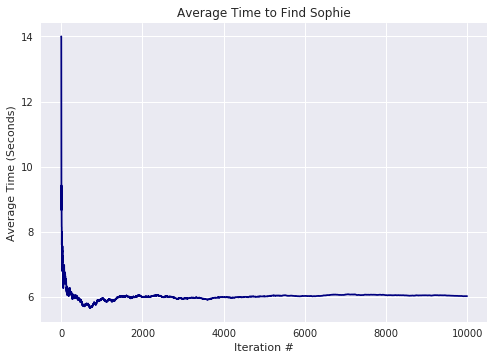

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

mpl.style.use('seaborn')
plt.plot(running_avg, color='navy')
plt.ylabel('Average Time (Seconds)')
plt.xlabel('Iteration #')
plt.title("Average Time to Find Sophie")
plt.show()